In [ ]:
# audio libraries
import librosa
import librosa.display as lplt
import IPython

# import matplotlib to be able to display graphs
import matplotlib.pyplot as plt

# transform .wav into .csv
import csv
import os
import numpy as np
import pandas as pd

# preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# model
import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential


In [ ]:
test_sound = "/content/drive/MyDrive/deepfake/bonafied/speaker1_1.wav"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Loads and decodes the audio.

In [ ]:
data, sr = librosa.load(test_sound)
print(type(data), type(sr))

<class 'numpy.ndarray'> <class 'int'>


In [ ]:
librosa.load(test_sound ,sr = 45600)

(array([ 5.6148124e-06,  2.2264756e-07, -1.4802205e-04, ...,
         1.1052581e-02,  1.2375710e-02,  1.0989698e-02], dtype=float32), 45600)

In [ ]:
IPython.display.Audio(data, rate = sr)

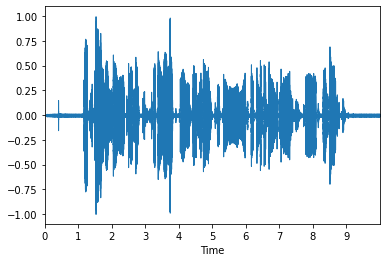

In [ ]:
plt.show(librosa.display.waveplot(data))

/usr/local/lib/python3.7/dist-packages/librosa/display.py:955: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  "Trying to display complex-valued input. " "Showing magnitude instead."


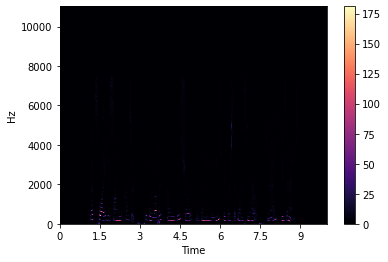

In [ ]:
stft = librosa.stft(data)
plt.colorbar(librosa.display.specshow(stft, sr = sr, x_axis = 'time', y_axis = 'hz'))

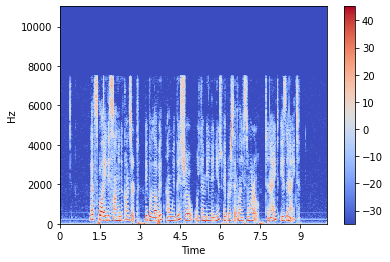

In [ ]:
stft_db = librosa.amplitude_to_db(abs(stft))
plt.colorbar(librosa.display.specshow(stft_db, sr = sr, x_axis = 'time', y_axis = 'hz'))

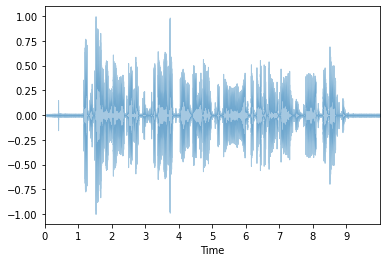

In [ ]:
spectral_rolloff = librosa.feature.spectral_rolloff(data + 0.01, sr = sr)[0]
plt.show(librosa.display.waveplot(data, sr = sr, alpha = 0.4))

In [ ]:
header = "filename length chroma_stft_mean chroma_stft_var rms_mean rms_var spectral_centroid_mean spectral_centroid_var spectral_bandwidth_mean \
        spectral_bandwidth_var rolloff_mean rolloff_var zero_crossing_rate_mean zero_crossing_rate_var harmony_mean harmony_var perceptr_mean \
        perceptr_var tempo mfcc1_mean mfcc1_var mfcc2_mean mfcc2_var mfcc3_mean mfcc3_var mfcc4_mean mfcc4_var label".split()

In [ ]:
file = open("data.csv", "w", newline = "")
with file:
    writer = csv.writer(file)
    writer.writerow(header)

In [ ]:
signals = 'bonafied spoofed'.split()
for i in signals:
    for filename in os.listdir(f'/content/drive/MyDrive/deepfake/{i}'):
        sound_name = f'/content/drive/MyDrive/deepfake/{i}/{filename}'
        y, sr = librosa.load(sound_name, mono = True, duration = 30)
        chroma_stft = librosa.feature.chroma_stft(y = y, sr = sr)
        rmse = librosa.feature.rms(y = y)
        spec_cent = librosa.feature.spectral_centroid(y = y, sr = sr)
        spec_bw = librosa.feature.spectral_bandwidth(y = y, sr = sr)
        rolloff = librosa.feature.spectral_rolloff(y = y, sr = sr)
        zcr = librosa.feature.zero_crossing_rate(y)
        mfcc = librosa.feature.mfcc(y = y, sr = sr)
        to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'

        for e in mfcc:
            to_append += f' {np.mean(e)}'

        to_append += f' {i}'
        file = open('data.csv', 'a', newline = '')

        with file:
            writer = csv.writer(file)
            writer.writerow(to_append.split())

- Display the `data.csv` file:

In [ ]:
df = pd.read_csv('data.csv')
df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,tempo,mfcc1_mean,mfcc1_var,mfcc2_mean,mfcc2_var,mfcc3_mean,mfcc3_var,mfcc4_mean,mfcc4_var,label
0,speaker2_3.wav,0.357012,0.029179,1612.133592,1614.426965,3127.535381,0.084238,-408.537811,117.974724,-13.295030,...,-3.287352,-5.684513,-8.848668,7.262153,-14.323671,3.853415,-1.957672,-6.964907,1.434188,bonafied
1,speaker2_10.wav,0.417591,0.030572,1799.254462,1715.363413,3500.444495,0.101326,-411.436462,108.534058,-16.274715,...,-0.471906,-5.693517,-6.475168,6.341163,-12.682714,4.664488,-3.495701,-3.271134,0.625755,bonafied
2,speaker1_1.wav,0.354865,0.099594,1546.346069,1630.220048,3036.606309,0.067336,-314.464081,109.015808,11.037415,...,-3.269161,0.711283,-1.694868,-0.065903,-3.867055,4.275507,-3.784744,1.128685,-0.282253,bonafied
3,speaker2_4.wav,0.400773,0.028654,1624.554610,1634.164776,3214.617453,0.087699,-424.345490,111.324883,-6.093676,...,-3.585384,-5.432772,-5.379810,3.862348,-11.451834,3.870184,-3.203945,-5.588360,0.912943,bonafied
4,speaker2_1.wav,0.371583,0.027750,1627.909850,1671.471210,3267.051552,0.088957,-403.419098,110.961411,-9.990746,...,-2.835618,-5.211580,-8.152755,6.557310,-13.056026,2.446765,-2.176261,-4.696386,0.252584,bonafied


In [ ]:
data=df.drop(['filename',"label"],axis=1)
data.head()

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,perceptr_var,tempo,mfcc1_mean,mfcc1_var,mfcc2_mean,mfcc2_var,mfcc3_mean,mfcc3_var,mfcc4_mean,mfcc4_var
0,0.357012,0.029179,1612.133592,1614.426965,3127.535381,0.084238,-408.537811,117.974724,-13.295030,36.349792,...,-8.962931,-3.287352,-5.684513,-8.848668,7.262153,-14.323671,3.853415,-1.957672,-6.964907,1.434188
1,0.417591,0.030572,1799.254462,1715.363413,3500.444495,0.101326,-411.436462,108.534058,-16.274715,39.040436,...,-6.396647,-0.471906,-5.693517,-6.475168,6.341163,-12.682714,4.664488,-3.495701,-3.271134,0.625755
2,0.354865,0.099594,1546.346069,1630.220048,3036.606309,0.067336,-314.464081,109.015808,11.037415,51.440228,...,0.400898,-3.269161,0.711283,-1.694868,-0.065903,-3.867055,4.275507,-3.784744,1.128685,-0.282253
3,0.400773,0.028654,1624.554610,1634.164776,3214.617453,0.087699,-424.345490,111.324883,-6.093676,33.982635,...,-5.803116,-3.585384,-5.432772,-5.379810,3.862348,-11.451834,3.870184,-3.203945,-5.588360,0.912943
4,0.371583,0.027750,1627.909850,1671.471210,3267.051552,0.088957,-403.419098,110.961411,-9.990746,42.324337,...,-10.768640,-2.835618,-5.211580,-8.152755,6.557310,-13.056026,2.446765,-2.176261,-4.696386,0.252584


In [ ]:
signal_list = data.iloc[:, -1]
encoder = LabelEncoder()
y = encoder.fit_transform(signal_list)

In [ ]:
X=data.iloc[:, :-1]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=1234456)

In [ ]:
X_train.shape

(80, 25)

In [ ]:
#Random Forest
RFClassifier = RandomForestClassifier(random_state=128649)
RFClassifier.fit(X_train, y_train)
predicted_labels = RFClassifier.predict(X_test)

In [ ]:
print(mt.classification_report(y_test,predicted_labels))

              precision    recall  f1-score   support

           6       0.00      0.00      0.00       1.0
           7       0.00      0.00      0.00       0.0
          12       0.00      0.00      0.00       0.0
          15       0.00      0.00      0.00       0.0
          17       0.00      0.00      0.00       0.0
          18       0.00      0.00      0.00       1.0
          24       0.00      0.00      0.00       1.0
          25       0.00      0.00      0.00       0.0
          26       0.00      0.00      0.00       1.0
          27       0.00      0.00      0.00       0.0
          28       0.00      0.00      0.00       0.0
          32       0.00      0.00      0.00       1.0
          37       0.00      0.00      0.00       0.0
          39       0.00      0.00      0.00       0.0
          41       0.00      0.00      0.00       1.0
          46       0.00      0.00      0.00       1.0
          49       0.00      0.00      0.00       1.0
          53       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

In [ ]:
# dataframe shape
df.shape

(100, 28)

In [ ]:
from sklearn.decomposition import PCA
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
import sklearn.metrics as mt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score, precision_score, accuracy_score
from sklearn.metrics import confusion_matrix, f1_score, classification_report
from sklearn.model_selection import cross_val_score

In [ ]:
pc = PCA(n_components=30)

In [ ]:
# dataframe types
df.dtypes

filename                    object
length                     float64
chroma_stft_mean           float64
chroma_stft_var            float64
rms_mean                   float64
rms_var                    float64
spectral_centroid_mean     float64
spectral_centroid_var      float64
spectral_bandwidth_mean    float64
spectral_bandwidth_var     float64
rolloff_mean               float64
rolloff_var                float64
zero_crossing_rate_mean    float64
zero_crossing_rate_var     float64
harmony_mean               float64
harmony_var                float64
perceptr_mean              float64
perceptr_var               float64
tempo                      float64
mfcc1_mean                 float64
mfcc1_var                  float64
mfcc2_mean                 float64
mfcc2_var                  float64
mfcc3_mean                 float64
mfcc3_var                  float64
mfcc4_mean                 float64
mfcc4_var                  float64
label                       object
dtype: object

In [ ]:
class_list = df.iloc[:,-1]
encoder = LabelEncoder()
y = encoder.fit_transform(class_list)
print("y: ", y)

y:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [ ]:
input_parameters = df.iloc[:, 1:27]
scaler = StandardScaler()
X = scaler.fit_transform(np.array(input_parameters))
print("X:", X)

X: [[-0.53256283 -1.15978733 -0.36180016 ...  0.09794934 -2.3691931
   1.23685659]
 [ 1.11495457 -1.12244505  0.83394577 ... -0.770814   -0.81098095
   0.91475651]
 [-0.59096037  0.72737363 -0.78219775 ... -0.93408158  1.04507591
   0.55298331]
 ...
 [-1.05130157  0.72186947  1.70736247 ...  0.24893692  0.68945926
   0.56773285]
 [-0.95129872  0.71641563  0.89232652 ... -1.57061902  1.19236528
   0.91956215]
 [-0.81442883 -0.04159348  1.61062085 ...  0.26813933  0.93523811
   0.70960172]]


In [ ]:
# training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2)

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(512, activation = 'relu', input_shape = (X_train.shape[1],)),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(256, activation = 'relu'),
    keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(45, activation = 'softmax'),
])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               13824     
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                8

In [ ]:
def trainModel(model,epochs, optimizer):
    batch_size = 128
    model.compile(optimizer = optimizer, loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
    return model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs = epochs, batch_size = batch_size)

In [ ]:
model_history = trainModel(model = model, epochs = 100, optimizer = 'adam')

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 3.7524 - accuracy: 0.0375 - val_loss: 3.5069 - val_accuracy: 0.4500
Epoch 2/100
1/1 [==============================] - 0s 72ms/step - loss: 3.4765 - accuracy: 0.2625 - val_loss: 3.2359 - val_accuracy: 0.5000
Epoch 3/100
1/1 [==============================] - 0s 66ms/step - loss: 3.0794 - accuracy: 0.4875 - val_loss: 2.9208 - val_accuracy: 0.5000
Epoch 4/100
1/1 [==============================] - 0s 57ms/step - loss: 2.7348 - accuracy: 0.5625 - val_loss: 2.5572 - val_accuracy: 0.5000
Epoch 5/100
1/1 [==============================] - 0s 47ms/step - loss: 2.4167 - accuracy: 0.5250 - val_loss: 2.1563 - val_accuracy: 0.5000
Epoch 6/100
1/1 [==============================] - 0s 50ms/step - loss: 1.9585 - accuracy: 0.5250 - val_loss: 1.7563 - val_accuracy: 0.5000
Epoch 7/100
1/1 [==============================] - 0s 47ms/step - loss: 1.5647 - accuracy: 0.5625 - val_loss: 1.4113 - val_accuracy: 0.5000
Epoch 8/100
1/1 [=====

- Display **loss** curves:

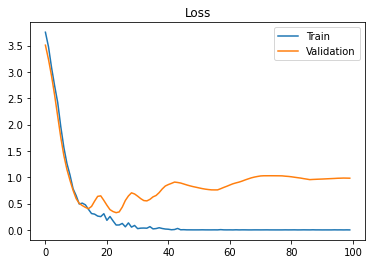

In [ ]:
loss_train_curve = model_history.history["loss"]
loss_val_curve = model_history.history["val_loss"]
plt.plot(loss_train_curve, label = "Train")
plt.plot(loss_val_curve, label = "Validation")
plt.legend(loc = 'upper right')
plt.title("Loss")
plt.show()

- Display **accuracy** curves:

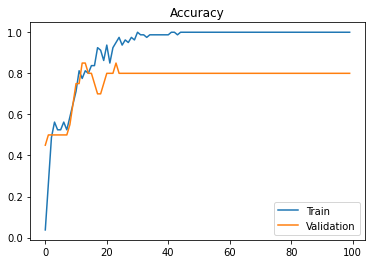

In [ ]:
acc_train_curve = model_history.history["accuracy"]
acc_val_curve = model_history.history["val_accuracy"]
plt.plot(acc_train_curve, label = "Train")
plt.plot(acc_val_curve, label = "Validation")
plt.legend(loc = 'lower right')
plt.title("Accuracy")
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(X_val, y_val, batch_size = 128)
print("The test loss is: ", test_loss)
print("The best accuracy is: ", test_acc*100)

1/1 [==============================] - 0s 38ms/step - loss: 0.9818 - accuracy: 0.8000
The test loss is:  0.9817627668380737
The best accuracy is:  80.0000011920929


In [ ]:
# header => for test data, we remove the columns "filename" and "label"
header_test = "filename length chroma_stft_mean chroma_stft_var rms_mean rms_var spectral_centroid_mean spectral_centroid_var spectral_bandwidth_mean \
        spectral_bandwidth_var rolloff_mean rolloff_var zero_crossing_rate_mean zero_crossing_rate_var harmony_mean harmony_var perceptr_mean perceptr_var tempo mfcc1_mean mfcc1_var mfcc2_mean \
        mfcc2_var mfcc3_mean mfcc3_var mfcc4_mean mfcc4_var".split()

- Create the `data_test.csv` file:

In [ ]:
file = open('data_test.csv', 'w', newline = '')
with file:
    writer = csv.writer(file)
    writer.writerow(header_test)

- Transform each `.wav` file into a `.csv` row:

In [ ]:
for filename in os.listdir(f"/content/drive/MyDrive/test/"):
    sound_name = f"/content/drive/MyDrive/test/{filename}"
    y, sr = librosa.load(sound_name, mono = True, duration = 30)
    chroma_stft = librosa.feature.chroma_stft(y = y, sr = sr)
    rmse = librosa.feature.rms(y = y)
    spec_cent = librosa.feature.spectral_centroid(y = y, sr = sr)
    spec_bw = librosa.feature.spectral_bandwidth(y = y, sr = sr)
    rolloff = librosa.feature.spectral_rolloff(y = y, sr = sr)
    zcr = librosa.feature.zero_crossing_rate(y)
    mfcc = librosa.feature.mfcc(y = y, sr = sr)
    to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'

    for e in mfcc:
        to_append += f' {np.mean(e)}'

    file = open('data_test.csv', 'a', newline = '')

    with file:
        writer = csv.writer(file)
        writer.writerow(to_append.split())

- Display the `data_test.csv` file:

In [ ]:
df_test = pd.read_csv('data_test.csv')
df_test.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,perceptr_var,tempo,mfcc1_mean,mfcc1_var,mfcc2_mean,mfcc2_var,mfcc3_mean,mfcc3_var,mfcc4_mean,mfcc4_var
0,testfake1.wav,0.355199,0.123547,1680.266421,1710.831655,3346.739391,0.078759,-239.824463,115.593376,-17.072886,...,-4.125934,-4.507997,-4.062606,-7.412193,6.632669,-11.350128,3.200363,-0.167577,-4.979613,0.081885


In [ ]:
X_test = scaler.transform(np.array(df_test.iloc[:, 1:27]))
print("X_test:", X_test)

X_test: [[-0.58185424  1.36932815  0.07358448  0.59831308  0.32243342 -0.79241573
   1.49575783  0.17922007 -1.15223876  0.12357097 -1.15305502  0.30861463
  -0.37158493 -0.39501954 -0.45529418  0.51793708 -0.49223043  0.28931945
  -1.01341592 -0.33599074  1.538809   -1.58591163  0.73327902  1.10909427
  -1.53170015  0.69806502]]


In [ ]:
data=df.drop(['filename',"label"],axis=1)
data.head()

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,perceptr_var,tempo,mfcc1_mean,mfcc1_var,mfcc2_mean,mfcc2_var,mfcc3_mean,mfcc3_var,mfcc4_mean,mfcc4_var
0,0.357012,0.029179,1612.133592,1614.426965,3127.535381,0.084238,-408.537811,117.974724,-13.295030,36.349792,...,-8.962931,-3.287352,-5.684513,-8.848668,7.262153,-14.323671,3.853415,-1.957672,-6.964907,1.434188
1,0.417591,0.030572,1799.254462,1715.363413,3500.444495,0.101326,-411.436462,108.534058,-16.274715,39.040436,...,-6.396647,-0.471906,-5.693517,-6.475168,6.341163,-12.682714,4.664488,-3.495701,-3.271134,0.625755
2,0.354865,0.099594,1546.346069,1630.220048,3036.606309,0.067336,-314.464081,109.015808,11.037415,51.440228,...,0.400898,-3.269161,0.711283,-1.694868,-0.065903,-3.867055,4.275507,-3.784744,1.128685,-0.282253
3,0.400773,0.028654,1624.554610,1634.164776,3214.617453,0.087699,-424.345490,111.324883,-6.093676,33.982635,...,-5.803116,-3.585384,-5.432772,-5.379810,3.862348,-11.451834,3.870184,-3.203945,-5.588360,0.912943
4,0.371583,0.027750,1627.909850,1671.471210,3267.051552,0.088957,-403.419098,110.961411,-9.990746,42.324337,...,-10.768640,-2.835618,-5.211580,-8.152755,6.557310,-13.056026,2.446765,-2.176261,-4.696386,0.252584


### 2. Predictions

In [ ]:
# generate predictions for samples
predictions = model.predict(X_test)
print(predictions)

1/1 [==============================] - 0s 280ms/step
[[3.33203087e-09 1.00000000e+00 1.89520518e-13 3.26726520e-13
  1.12685494e-15 6.74113818e-17 2.12395650e-15 7.02348920e-16
  1.38499747e-16 8.64530319e-16 3.11669029e-16 1.83985105e-10
  8.75643484e-14 3.31365192e-16 1.43989487e-16 9.18166774e-15
  3.22424596e-13 1.36138515e-14 9.69984015e-16 1.82479682e-12
  3.24769101e-11 1.66293021e-11 1.01769487e-11 2.40842415e-12
  9.17024364e-14 2.58810378e-12 9.42438821e-16 3.15950631e-18
  1.76522693e-15 3.76010399e-17 4.81159390e-10 3.44628894e-13
  4.92955286e-13 6.07001157e-14 6.78624908e-14 1.17561776e-13
  5.93384828e-17 3.63634307e-13 3.07997748e-14 1.20963101e-11
  4.26770029e-14 7.07661197e-14 2.95452038e-14 1.01739245e-14
  2.93720647e-12]]


In [ ]:
# generate argmax for predictions
classes = np.argmax(predictions, axis = 1)
print(classes)

[1]


In [ ]:
# transform classes number into classes name
result = encoder.inverse_transform(classes)
print(result)

['spoofed']
